## Observations and Insights 

1. There is a positive correlation of 0.84. You can infer that the weight of the subject mouse and average tumor volume move in tandem. 2. Campomulin and Ramicane were the most successful drug regimens that reduced the volume of tumors. The sex of the mice had little to no affect on how the drug regimens determined tumor volumes. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv("../Resources/metadata.csv")
mouse_results_df = pd.read_csv("../Resources/Study_results.csv")
                           
# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata_df,mouse_results_df,on="Mouse ID")

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count = combined_data_df["Mouse ID"].count()
count


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df[combined_data_df["Mouse ID"] !="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df.nunique(axis=0)
clean_mice

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [7]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumorvolume_by_regimen = clean_df.groupby('Drug Regimen')

mean = tumorvolume_by_regimen.mean()['Tumor Volume (mm3)']
median = tumorvolume_by_regimen.median()['Tumor Volume (mm3)']
variance = tumorvolume_by_regimen.var()['Tumor Volume (mm3)']
standard_d = tumorvolume_by_regimen.std()['Tumor Volume (mm3)']
calc_sems = tumorvolume_by_regimen.sem()['Tumor Volume (mm3)']

summary_table_one = pd.DataFrame({"Mean": mean, 
                                    "Median": median,
                                    "Variance":variance,
                                    "Std.": standard_d,
                                 "SEMS": calc_sems})

summary_table_one

,Mean,Median,Variance,Std.,SEMS
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumorvolume_by_regimen.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
numbers = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
numbers

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

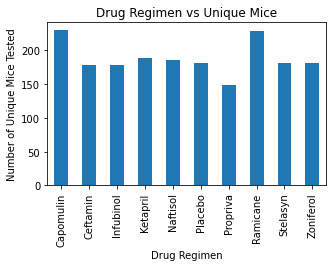

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

numbers.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Drug Regimen vs Unique Mice")
plt.ylabel("Number of Unique Mice Tested")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Unique Mice Tested')

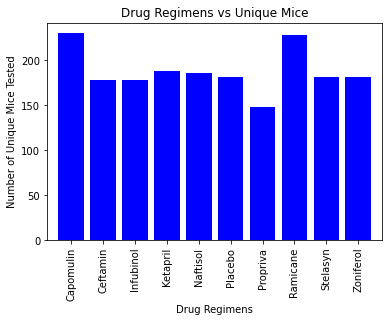

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Create array the contains the name of each drug and the number of mice 
drug_regimens = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
total_unique_mice = [230,178,178,188,186,181,148,228,181,182]
x_axis = np.arange(len(total_unique_mice))
plt.bar(x_axis, total_unique_mice, color="b", align="center")

 #Create ticks for the x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens, rotation = 'vertical')

#Set limits for the x axis
plt.xlim(-0.75, len(x_axis)-.25)

# Give the chart a title, x label, and y label
plt.title("Drug Regimens vs Unique Mice")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Unique Mice Tested")


In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Create dataframe of the sex and count of unique mice
gender = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender

#Create dataframe for pie plot
gender = gender[["Sex","Mouse ID"]]
gender = gender.rename(columns={"Mouse ID": "Count"})
gender.head()

,Sex,Count
0,Female,922
1,Male,958


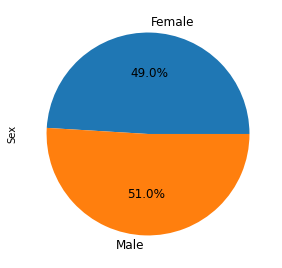

In [14]:
#Create pie chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_pie = gender.plot(kind="pie", y="Count", ax=ax1, autopct='%1.1f%%', 
 startangle=0, shadow=False, labels=gender['Sex'], legend = False, fontsize=12)
plt.ylabel("Sex")
gender_pie


Text(0, 0.5, 'Sex')

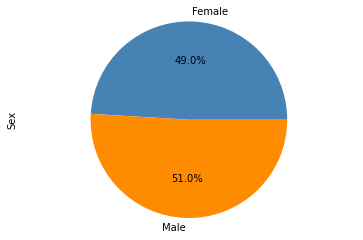

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = ["Female","Male"]
sex_count = [922,958]
colors = ["steelblue","darkorange"]
explode = (0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(sex_count, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
# Create axes which are equal so we have a perfect circle, label y axis
plt.axis("equal")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [16]:
#Use loc to create dataframe for each drug regimen and the unqiue mouse

capo_df =clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
rami_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infu_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceft_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
capo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
capo_lasttime = capo_df.groupby('Mouse ID').max()['Timepoint']
capo_lastvol = pd.DataFrame(capo_lasttime)
capo_lastmerge = pd.merge(capo_lastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")
capo_lastmerge.head()

capotumor = capo_lastmerge["Tumor Volume (mm3)"]

quartiles = capotumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin outliers values are below {lower_bound} and above {upper_bound}.")

Capomulin outliers values are below 20.70456164999999 and above 51.83201549.


In [20]:

rami_lasttime = rami_df.groupby('Mouse ID').max()['Timepoint']
rami_lastvol = pd.DataFrame(rami_lasttime)
rami_lastmerge = pd.merge(rami_lastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")
rami_lastmerge.head()

ramitumor = rami_lastmerge["Tumor Volume (mm3)"]

quartiles2 = ramitumor.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane outliers are below {lower_bound2} and above {upper_bound2}.")

Ramicane outliers are below 17.912664470000003 and above 54.30681135.


In [21]:
infu_lasttime = infu_df.groupby('Mouse ID').max()['Timepoint']
infu_lastvol = pd.DataFrame(infu_lasttime)
infu_lastmerge = pd.merge(infu_lastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")
infu_lastmerge.head()

infutumor = infu_lastmerge["Tumor Volume (mm3)"]

quartiles3 = infutumor.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol outliers values are below {lower_bound3} and above {upper_bound3}.")

Infubinol outliers values are below 36.83290494999999 and above 82.74144559000001.


In [22]:

ceft_lasttime = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceft_lastvol = pd.DataFrame(ceft_lasttime)
ceft_lastmerge = pd.merge(ceft_lastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ceft_lastmerge.head()


cefttumor = ceft_lastmerge["Tumor Volume (mm3)"]

quartiles4 = cefttumor.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin outliers are below {lower_bound4} and above {upper_bound4}.")

Ceftamin outliers are below 25.355449580000002 and above 87.66645829999999.


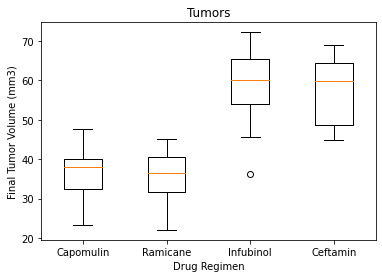

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plot_data = [capotumor,ramitumor,infutumor,cefttumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(plot_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()


## Line and Scatter Plots

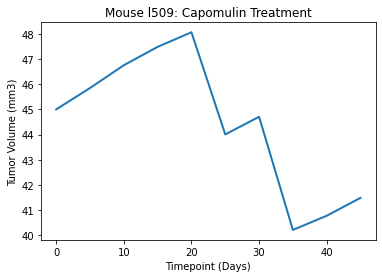

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

lineplot_df = capo_df.loc[capo_df["Mouse ID"] == "l509",:]
lineplot_df.head()

x_axisTP = lineplot_df["Timepoint"]
tumorvol = lineplot_df["Tumor Volume (mm3)"]

plt.title('Mouse l509: Capomulin Treatment')
plt.plot(x_axisTP, tumorvol,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

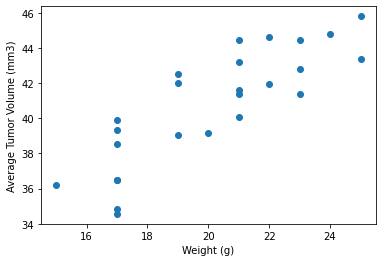

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capo_average = capo_df.groupby(['Mouse ID']).mean()
plt.scatter(capo_average['Weight (g)'],capo_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

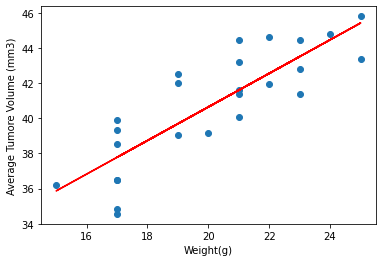

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capo_average['Weight (g)'],capo_average['Tumor Volume (mm3)'])[0],2)
corr

model=st.linregress(capo_average['Weight (g)'],capo_average['Tumor Volume (mm3)'])
model

#Define slope and intercept
mslope = 0.9544396890241045
bintercept = 21.552160532685015

 
y_values = capo_average['Weight (g)']*mslope+bintercept
plt.scatter(capo_average['Weight (g)'],capo_average['Tumor Volume (mm3)'])
plt.plot(capo_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()